In [1]:
import uproot as u
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from global_settings import *
from df_utils import *
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [2]:
run = "run3"
data = True
dm_type = "fermion"
ratio = "0.6"
target_pot = 1.
signal_pot = {}
extra_factor= 0.01

signal_correction = { "0.01":0.94903385, "0.02":1.03561568, "0.03":1.02326517, "0.04":1.00641579, 
                     "0.05":1.00650082, "0.06":1.01293082, "0.07":1.07433777, 
                     "0.08":1.10175345, "0.09":1.0415591 , "0.10":1.1014797}


if(dm_type == "fermion"):
    signal_pot = { "0.01":3.9e19, "0.02":3.4e+20, "0.03":1.49e+21, 
                  "0.04":5.59e+21, "0.05":1.89e+22, "0.06":6.02e+22,
                  "0.07":1.8e+23, "0.08":5.6e+23, 
                  "0.09":1.2e+24, "0.10":2.9e+25}

else: 
    signal_pot = { "0.01":8.8e+20, "0.02": 9.05e+21, "0.03":4.7e+22, 
                  "0.04":1.8e+23, "0.05":7.7e+23, "0.06":2.7e+24,
                  "0.07":7.9e+24, "0.08":2.34e+25, 
                  "0.09":3.9e+25, "0.10":8.8e+25}


scalings_run1 = { "nu":1./2.35e21, "dirt":1.026*0.75/1.6e21, "beamoff": 0.98*(6230439.0/9186361.390000)}
scalings_run3 = { "nu":1./1.993661e21, "dirt":1.0*0.35/1.020e21, "beamoff": 0.98*(10522703.0/34093009.725000)}

scalings = {}

if(run == "run1"):
    run_flag = "Run 1"
    target_pot = 2.384e+20
    scalings = scalings_run1
    pot_label = r' $2.38\times10^{20}$ POT'
    meson_correction_pi0 = 11.7
    meson_correction_eta = 7.2
else:
    run_flag = "Run 3"
    target_pot = 5.11e20
    scalings = scalings_run3
    pot_label = r'$5.18\times10^{20}$ POT'
    meson_correction_pi0 = 11.7
    meson_correction_eta = 7.2

nu_scaling = target_pot*scalings["nu"]
dirt_scaling = target_pot*scalings["dirt"]
offbeam_scaling = scalings["beamoff"]
multisim_uncertainty = 0.2 
detvars_uncertainty = 0.3

In [3]:
def GetStatsUncert(df_a, weight_array,my_custom_bins,plot_var):
    (counts_df, bins_df) = np.histogram(df_a[plot_var], bins = my_custom_bins, weights=np.square(weight_array))
    return counts_df 

In [4]:
base_dir = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/" + run + "_samples/" 
signal_dir = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/" + run + "_signal/"
plots_dir = "/home/lmlepin/Desktop/Plots_DT_Drive/2023/data_mc/"

mass_a = "0.01"
mass_b = "0.05" 
mass_c = "0.4"
df_signal_a = pd.read_csv(signal_dir + "{}_dt_ratio_{}_{}_pi0_CNN_scores_8441_steps.csv".format(run,ratio,mass_a))
df_signal_b = pd.read_csv(signal_dir + "{}_dt_ratio_{}_{}_pi0_CNN_scores_8441_steps.csv".format(run,ratio,mass_b))
df_signal_c = pd.read_csv(signal_dir + "{}_dt_ratio_{}_{}_eta_CNN_scores_8441_steps.csv".format(run,ratio,mass_c))
df_nu = pd.read_csv(base_dir + run + "_nu_overlay_CNN_scores_8441_steps.csv")


MC_weight_branch(df_nu)

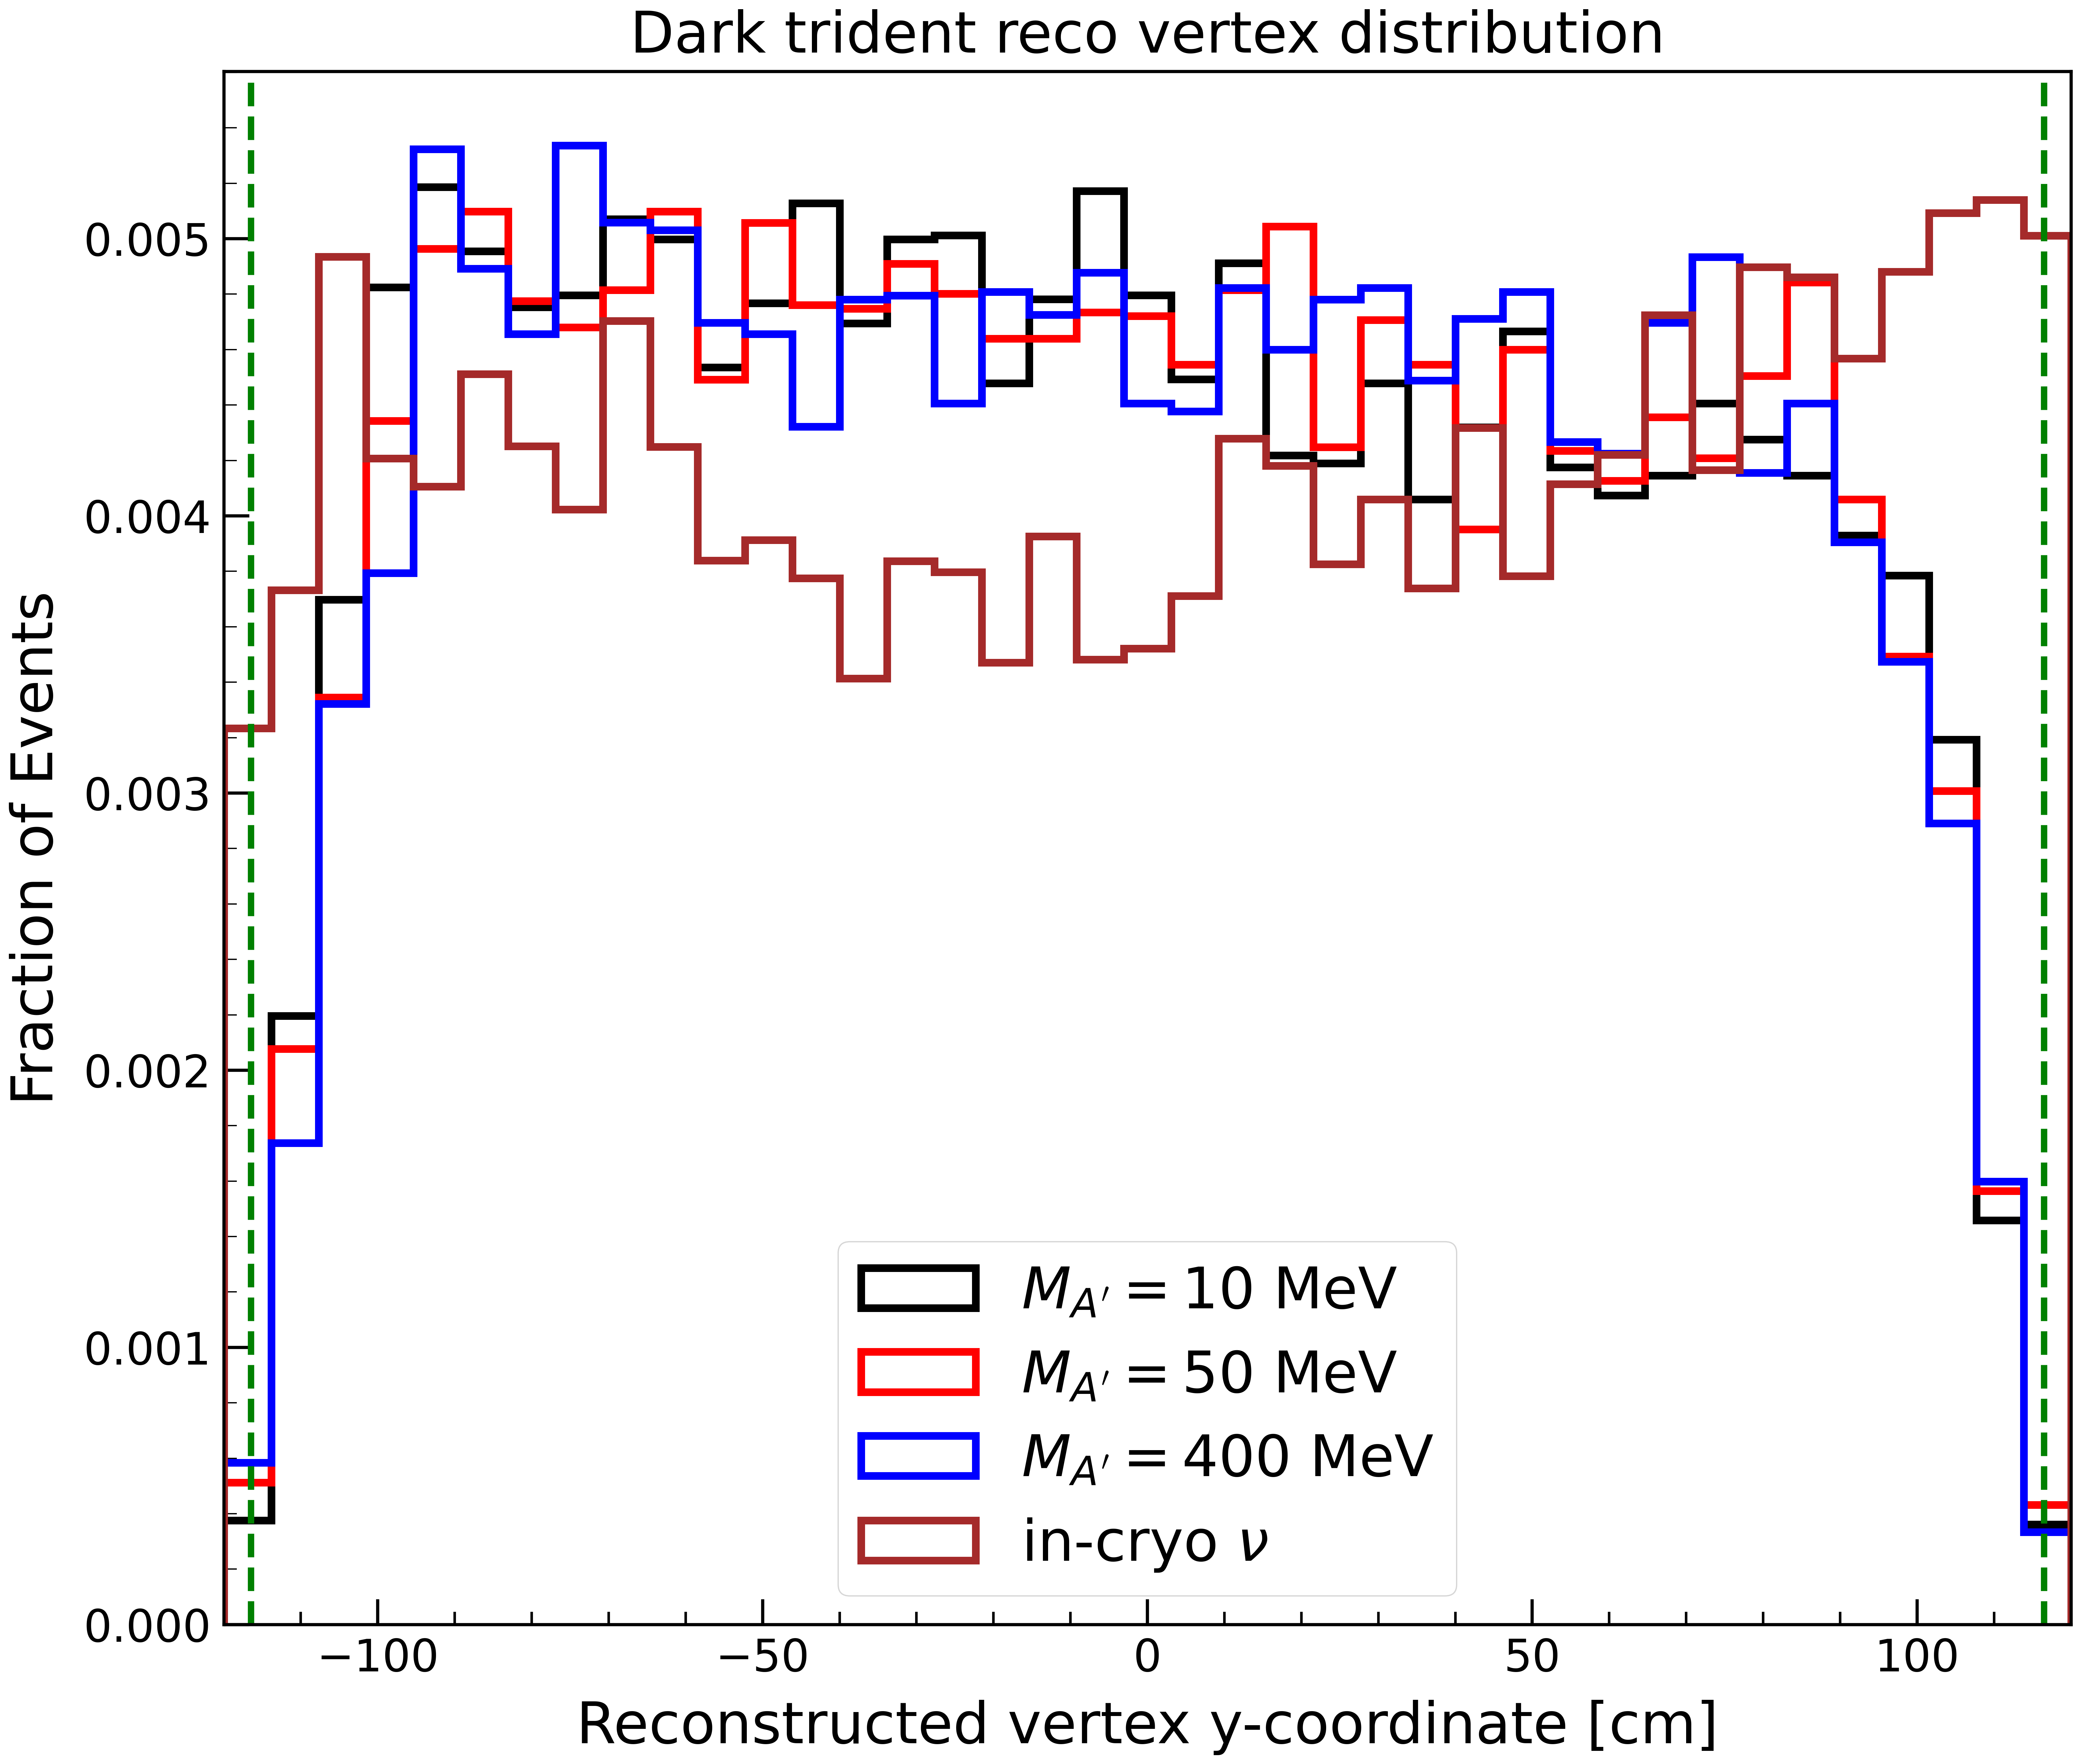

In [5]:
nbins = 40 
up_hist = 120.
down_hist = -120.
up_plot = 120.
down_plot = -120.
my_custom_bins = np.linspace(down_hist,up_hist,nbins)
variable = 'reco_vertex_y'

(counts_a, bins_a) = np.histogram(df_signal_a[variable], bins = my_custom_bins)
(counts_b, bins_b) = np.histogram(df_signal_b[variable], bins = my_custom_bins)
(counts_c, bins_c) = np.histogram(df_signal_c[variable], bins = my_custom_bins)
(counts_d, bins_d) = np.histogram(df_nu[variable], bins = my_custom_bins, weights = df_nu['weight'])


fig, ax = plt.subplots(1,1,figsize=(26,22),dpi=300)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color
    
    
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())



#if(data):
    #ax.plot([], [], ' ', label=f"Data/MC = {data_mc:.2f}")   



ax.hist(bins_a[:-1], bins = bins_a,weights=counts_a, density=True, histtype='step',label=r'$M_{A^\prime}=10$ MeV',fill=False, edgecolor='black', linewidth=6)
ax.hist(bins_b[:-1], bins = bins_b,weights=counts_b, density=True, histtype='step',label=r'$M_{A^\prime}=50$ MeV',fill=False, edgecolor='red', linewidth=6)
ax.hist(bins_c[:-1], bins = bins_c,weights=counts_c, density=True, histtype='step',label=r'$M_{A^\prime}=400$ MeV',fill=False, edgecolor='blue', linewidth=6)
ax.hist(bins_d[:-1], bins = bins_d,weights=counts_d, density=True, histtype='step',label=r'in-cryo $\nu$',fill=False, edgecolor='brown',linewidth=6)
ax.legend(fontsize=45,loc='lower center')
ax.tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10, labelsize=35)
ax.tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False, labelsize=35)
ax.tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10, bottom=True,top=False,labelbottom=True, labelsize=35)
ax.tick_params(axis="x", which='minor', direction="in",length=10,width=2.0, bottom=True,top=False,labelbottom=True, labelsize=35)
ax.axvline(-116.5,ymin=0,ymax=1.,ls="--",color='green',lw=5.)
ax.axvline(116.5,ymin=0,ymax=1.,ls="--",color='green',lw=5.)
ax.set_xlim(down_plot,up_plot)
ax.set_title("Dark trident reco vertex distribution",fontsize=45,pad=15)
ax.set_ylabel("Fraction of Events",fontsize=45, labelpad=15) 
ax.set_xlabel(r'Reconstructed vertex y-coordinate [cm]',fontsize=45,labelpad=15)
#plt.savefig(plots_dir + "data_mc_comparison_shower_cut_" + run + "_" + variable + "_paper_V.png",bbox_inches="tight")
#plt.savefig(plots_dir + "data_mc_comparison_shower_cut_" + run + "_" + variable + "_paper_V.pdf",bbox_inches="tight")
plt.show()